# Web Scrapping Part

In [ ]:
# loading libraries
import requests
from bs4 import BeautifulSoup
from bs4 import Comment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Gather information on NBA teams and their comprehensive statistics from the previous season through web scraping.

In [33]:
# making the request for the html file
url = 'https://www.basketball-reference.com/leagues/NBA_2021_ratings.html'
response = requests.get(url)
print(response)

<Response [200]>


In [34]:
# parsing the html file using BeautifulSoup
soup = BeautifulSoup(response.content,"html.parser")

In [35]:
# parsing the titles of the stats table

table_title = soup.find('thead')
th = table_title.find_all('th')

table_headings=[i.text for i in th]
table_headings = table_headings[4:]
table_headings

names={}
for i,name in enumerate(table_headings):
    names[i]=name

In [36]:
# parsing the table with the Teams' stats
table = soup.find('tbody')
teams = table.find_all('tr')

team_link =[]
team_name=[]
conf_id=[]
div_id=[]
wins=[]
losses =[]
win_loss_pct=[]
mov=[]
off_rtg=[]
def_rtg=[]
net_rtg=[]
mov_adj=[]
off_rtg_adj=[]
def_rtg_adj=[]
net_rtg_adj=[]

for team in teams:
    team_link.append(team.find('a').get('href'))
    team_name.append(team.find('td',attrs={"data-stat" : "team_name"}).text)
    conf_id.append(team.find('td',attrs={"data-stat" : "conf_id"}).text)
    div_id.append(team.find('td',attrs={"data-stat" : "div_id"}).text)
    wins.append(int(team.find('td',attrs={"data-stat" : "wins"}).text))
    losses.append(int(team.find('td',attrs={"data-stat" : "losses"}).text))
    win_loss_pct.append(float(team.find('td',attrs={"data-stat" : "win_loss_pct"}).text))
    mov.append(float(team.find('td',attrs={"data-stat" : "mov"}).text))
    off_rtg.append(float(team.find('td',attrs={"data-stat" : "off_rtg"}).text))
    def_rtg.append(float(team.find('td',attrs={"data-stat" : "def_rtg"}).text))
    net_rtg.append(float(team.find('td',attrs={"data-stat" : "net_rtg"}).text))
    mov_adj.append(float(team.find('td',attrs={"data-stat" : "mov_adj"}).text))
    off_rtg_adj.append(float(team.find('td',attrs={"data-stat" : "off_rtg_adj"}).text))
    def_rtg_adj.append(float(team.find('td',attrs={"data-stat" : "def_rtg_adj"}).text))
    net_rtg_adj.append(float(team.find('td',attrs={"data-stat" : "net_rtg_adj"}).text))
    
Team_Ratings= pd.DataFrame([team_name,conf_id,div_id,wins,losses,
                            win_loss_pct,mov,off_rtg,def_rtg,net_rtg,
                            mov_adj,off_rtg_adj,def_rtg_adj,net_rtg_adj])
Team_Ratings = Team_Ratings.rename(index=names).T

Ab={}
Ab['Team_Ab'] = []
for link in team_link:
    Ab['Team_Ab'].append(link.split('/')[2])
Team_Ab = pd.DataFrame(Ab)
Team_Ratings = pd.concat([Team_Ab,Team_Ratings], axis=1)

Team_Ratings.drop(Team_Ratings.filter(regex="Unnamed"),axis=1, inplace=True)
Team_Ratings

,Team_Ab,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,UTA,Utah Jazz,W,NW,52,20,0.722,9.25,118.42,108.94,9.48,8.96,118.23,109.04,9.2
1,LAC,Los Angeles Clippers,W,P,47,25,0.653,6.18,118.39,112.13,6.26,6.02,118.34,112.23,6.11
2,PHO,Phoenix Suns,W,P,51,21,0.708,5.82,118.01,112.14,5.87,5.67,117.96,112.22,5.74
3,MIL,Milwaukee Bucks,E,C,46,26,0.639,5.89,117.68,112.03,5.65,5.57,117.67,112.34,5.33
4,PHI,Philadelphia 76ers,E,A,49,23,0.681,5.58,114.13,108.51,5.62,5.28,113.96,108.66,5.3
5,DEN,Denver Nuggets,W,NW,47,25,0.653,4.93,118.04,113.01,5.03,4.82,118.02,113.1,4.92
6,BRK,Brooklyn Nets,E,A,48,24,0.667,4.5,118.91,114.4,4.52,4.24,119.0,114.76,4.24
7,LAL,Los Angeles Lakers,W,P,42,30,0.583,2.79,110.52,107.84,2.68,2.76,110.28,107.6,2.67
8,DAL,Dallas Mavericks,W,SW,42,30,0.583,2.26,116.16,113.79,2.37,2.26,116.18,113.8,2.38
9,NYK,New York Knicks,E,A,41,31,0.569,2.31,111.38,108.97,2.41,2.13,111.23,109.01,2.21


In [37]:
# writing out into csv
Team_Ratings.to_csv('Team_Ratings.csv')

## Retrieve data on NBA players, including their statistics and average salaries from the most recent season, using web scraping.

In [38]:
# finding for team more advance statistics

url_base= 'https://www.basketball-reference.com'
url = url_base + team_link[0]

response = requests.get(url)
print(response)

soup = BeautifulSoup(response.content,"html.parser")

<Response [200]>


In [39]:
for link in team_link:
    
    url_base= 'https://www.basketball-reference.com'
    url = url_base + link
    response = requests.get(url)
    soup = BeautifulSoup(response.content,"html.parser")
    
    # finding the table that contain each player season stats per game
    tbody= soup.find_all('tbody')
    pl_sts = tbody[1]
    players_stats = pl_sts.find_all('tr')
    
    # identifying the team we want to examine
    h1 = soup.find('h1')
    span = h1.find_all('span')
    team = span[1].text
    
    # identifying the team's abbreviation
    team_ab = link.split('/')[2]

    # initializing and populate a dictionary with keys, the names of the columns of stats table and values
    # each player's stats
    Player_Stats = {}
    Player_Stats['Team']=[]
    Player_Stats['Team_Ab']=[]
    Player_Stats['Name']=[]
    Player_Stats['Age']=[]
    Player_Stats['G']=[]
    Player_Stats['GS']=[]
    Player_Stats['MP']=[]
    Player_Stats['FG']=[]
    Player_Stats['FGA']=[]
    Player_Stats['FG%']=[]
    Player_Stats['3P']=[]
    Player_Stats['3PA']=[]
    Player_Stats['3P%']=[]
    Player_Stats['2P']=[]
    Player_Stats['2PA']=[]
    Player_Stats['2P%']=[]
    Player_Stats['eFG%']=[]
    Player_Stats['FT']=[]
    Player_Stats['FTA']=[]
    Player_Stats['FT%']=[]
    Player_Stats['ORB']=[]
    Player_Stats['DRB']=[]
    Player_Stats['TRB']=[]
    Player_Stats['AST']=[]
    Player_Stats['STL']=[]
    Player_Stats['BLK']=[]
    Player_Stats['TOV']=[]
    Player_Stats['PF']=[]
    Player_Stats['PTS/G']=[]
    
    for player in players_stats:
        Player_Stats['Team'].append(team)
        Player_Stats['Team_Ab'].append(team_ab)
        Player_Stats['Name'].append(player.find('td', {'data-stat' : 'player'}).text)
        Player_Stats['Age'].append(player.find('td', {'data-stat' : 'age'}).text)
        Player_Stats['G'].append(player.find('td', {'data-stat' : 'g'}).text)
        Player_Stats['GS'].append(player.find('td', {'data-stat' : 'gs'}).text)
        Player_Stats['MP'].append(player.find('td', {'data-stat' : 'mp_per_g'}).text)
        Player_Stats['FG'].append(player.find('td', {'data-stat' : 'fg_per_g'}).text)
        Player_Stats['FGA'].append(player.find('td', {'data-stat' : 'fga_per_g'}).text)
        Player_Stats['FG%'].append((player.find('td', {'data-stat' : 'fg_pct'}).text).strip())
        Player_Stats['3P'].append(player.find('td', {'data-stat' : 'fg3_per_g'}).text)
        Player_Stats['3PA'].append(player.find('td', {'data-stat' : 'fg3a_per_g'}).text)
        Player_Stats['3P%'].append((player.find('td', {'data-stat' : 'fg3_pct'}).text).strip())
        Player_Stats['2P'].append(player.find('td', {'data-stat' : 'fg2_per_g'}).text)
        Player_Stats['2PA'].append(player.find('td', {'data-stat' : 'fg2a_per_g'}).text)
        Player_Stats['2P%'].append((player.find('td', {'data-stat' : 'fg2_pct'}).text).strip())
        Player_Stats['eFG%'].append((player.find('td', {'data-stat' : 'efg_pct'}).text).strip())
        Player_Stats['FT'].append(player.find('td', {'data-stat' : 'ft_per_g'}).text)
        Player_Stats['FTA'].append(player.find('td', {'data-stat' : 'fta_per_g'}).text)
        Player_Stats['FT%'].append((player.find('td', {'data-stat' : 'ft_pct'}).text).strip())
        Player_Stats['ORB'].append(player.find('td', {'data-stat' : 'orb_per_g'}).text)
        Player_Stats['DRB'].append(player.find('td', {'data-stat' : 'drb_per_g'}).text)
        Player_Stats['TRB'].append(player.find('td', {'data-stat' : 'trb_per_g'}).text)
        Player_Stats['AST'].append(player.find('td', {'data-stat' : 'ast_per_g'}).text)
        Player_Stats['STL'].append(player.find('td', {'data-stat' : 'stl_per_g'}).text)
        Player_Stats['BLK'].append(player.find('td', {'data-stat' : 'blk_per_g'}).text)
        Player_Stats['TOV'].append(player.find('td', {'data-stat' : 'tov_per_g'}).text)
        Player_Stats['PF'].append(player.find('td', {'data-stat' : 'pf_per_g'}).text)
        Player_Stats['PTS/G'].append(player.find('td', {'data-stat' : 'pts_per_g'}).text)
    
    # creating a df for every team that has the player stats for the roster of the team
    Teams_Players_Stats = pd.DataFrame(Player_Stats)
    
    # merging each teams df into one dataframe that contains the stats of all players in the NBA
    if link == team_link[0]:
        Players_Stats = Teams_Players_Stats
    else:
        temp = Players_Stats
        Players_Stats = pd.concat([temp, Teams_Players_Stats], axis=0, ignore_index=True, join='outer')

Players_Stats

,Team,Team_Ab,Name,Age,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G
0,Utah Jazz,UTA,Donovan Mitchell,24,53,53,33.4,9.0,20.6,.438,...,.845,0.9,3.5,4.4,5.2,1.0,0.3,2.8,2.2,26.4
1,Utah Jazz,UTA,Royce O'Neale,27,71,71,31.6,2.5,5.5,.444,...,.848,1.2,5.6,6.8,2.5,0.8,0.5,1.2,2.6,7.0
2,Utah Jazz,UTA,Bojan Bogdanović,31,72,72,30.8,5.6,12.8,.439,...,.879,0.6,3.3,3.9,1.9,0.6,0.1,1.8,1.6,17.0
3,Utah Jazz,UTA,Rudy Gobert,28,71,71,30.8,5.5,8.2,.675,...,.623,3.4,10.1,13.5,1.3,0.6,2.7,1.7,2.3,14.3
4,Utah Jazz,UTA,Mike Conley,33,51,51,29.4,5.6,12.5,.444,...,.852,0.7,2.8,3.5,6.0,1.4,0.2,1.9,1.9,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Oklahoma City Thunder,OKC,Jaylen Hoard,21,19,0,16.8,2.3,4.6,.500,...,.683,1.1,2.3,3.4,1.3,0.7,0.3,0.9,1.0,6.1
622,Oklahoma City Thunder,OKC,Justin Jackson,25,33,3,16.5,2.6,6.4,.406,...,.857,0.4,1.7,2.2,1.5,0.5,0.1,0.9,0.9,7.2
623,Oklahoma City Thunder,OKC,Josh Hall,20,21,1,16.0,1.4,4.7,.303,...,.500,0.3,2.5,2.8,1.3,0.2,0.0,1.2,1.8,4.1
624,Oklahoma City Thunder,OKC,Darius Miller,30,18,0,10.9,1.2,2.7,.458,...,1.000,0.1,1.2,1.3,1.2,0.7,0.3,0.4,0.7,4.1


In [40]:
# scraping the avegage salary from every player in NBA
for link in team_link:
    
    url_base= 'https://www.basketball-reference.com'
    url = url_base + link
    response = requests.get(url)
    soup = BeautifulSoup(response.content,"html.parser")
    
    comments = soup.find_all(string=lambda text: isinstance(text, Comment))
    
    salary=[]
    comment_salatics = comments[-39]
    cs = comment_salatics.split('$')
    cs = cs[1:]
    for i in range(len(cs)):
        temp= cs[i]
        temp1 = temp.split('<')
        money = temp1[0].replace(',','')
        salary.append(int(money))    

    name=[]
    comments[-39]
    cs = comment_salatics.split('.html">')
    cs = cs[1:]
    for i in range(len(cs)):
        temp= cs[i]
        temp1 = temp.split('<')
        name.append(temp1[0])
    
    df = pd.DataFrame([name,salary])
    df = df.T

    # merging each teams df into one dataframe that contains the stats of all players in the NBA
    if link == team_link[0]:
        Players_Salaries = df
    else:
        temp = Players_Salaries
        Players_Salaries = pd.concat([temp, df], axis=0, ignore_index=True, join='outer')

Players_Salaries.rename(columns={0:'Name', 1: 'Salary'}, inplace=True)

temp = pd.merge( Players_Stats, Players_Salaries, on='Name',how='left')
Players_Stats = temp
Players_Stats

,Team,Team_Ab,Name,Age,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G,Salary
0,Utah Jazz,UTA,Donovan Mitchell,24,53,53,33.4,9.0,20.6,.438,...,0.9,3.5,4.4,5.2,1.0,0.3,2.8,2.2,26.4,5195501
1,Utah Jazz,UTA,Royce O'Neale,27,71,71,31.6,2.5,5.5,.444,...,1.2,5.6,6.8,2.5,0.8,0.5,1.2,2.6,7.0,8500000
2,Utah Jazz,UTA,Bojan Bogdanović,31,72,72,30.8,5.6,12.8,.439,...,0.6,3.3,3.9,1.9,0.6,0.1,1.8,1.6,17.0,17850000
3,Utah Jazz,UTA,Rudy Gobert,28,71,71,30.8,5.5,8.2,.675,...,3.4,10.1,13.5,1.3,0.6,2.7,1.7,2.3,14.3,27525281
4,Utah Jazz,UTA,Mike Conley,33,51,51,29.4,5.6,12.5,.444,...,0.7,2.8,3.5,6.0,1.4,0.2,1.9,1.9,16.2,34504132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Oklahoma City Thunder,OKC,Justin Jackson,25,33,3,16.5,2.6,6.4,.406,...,0.4,1.7,2.2,1.5,0.5,0.1,0.9,0.9,7.2,0
710,Oklahoma City Thunder,OKC,Justin Jackson,25,33,3,16.5,2.6,6.4,.406,...,0.4,1.7,2.2,1.5,0.5,0.1,0.9,0.9,7.2,5029650
711,Oklahoma City Thunder,OKC,Josh Hall,20,21,1,16.0,1.4,4.7,.303,...,0.3,2.5,2.8,1.3,0.2,0.0,1.2,1.8,4.1,0
712,Oklahoma City Thunder,OKC,Darius Miller,30,18,0,10.9,1.2,2.7,.458,...,0.1,1.2,1.3,1.2,0.7,0.3,0.4,0.7,4.1,7000000


In [10]:
# writing out in a csv
Players_Stats.to_csv('Players_Stats.csv')

## Collect advanced statistics for all NBA players from the 2020-2021 season through web scraping.

In [41]:
# making the request for the html file
url = 'https://www.basketball-reference.com/leagues/NBA_2021_advanced.html'
response = requests.get(url)

# Parse the html file using BeautifulSoup
soup = BeautifulSoup(response.content,"html.parser")

In [42]:
# parsing the titles of the stats table
thead = soup.find('thead')
titles = thead.find_all('th')
titles

title= []
for item in titles:
    title.append(item.text)

In [43]:
tbody = soup.find('tbody')
players= tbody.find_all('tr')

Players_Advance = {}
for name in title:
    if name!= '\xa0':
        Players_Advance[name]=[]
del Players_Advance['Rk']


for player in players:
    if player.find('td')!= None:
        Players_Advance['Player'].append(player.find('td', {'data-stat':'player'}).text)
        Players_Advance['Pos'].append(player.find('td', {'data-stat':'pos'}).text)
        Players_Advance['Age'].append(player.find('td', {'data-stat':'age'}).text)
        Players_Advance['Tm'].append(player.find('td', {'data-stat':'team_id'}).text)
        Players_Advance['G'].append(player.find('td', {'data-stat':'g'}).text)
        Players_Advance['MP'].append(player.find('td', {'data-stat':'mp'}).text)
        Players_Advance['PER'].append(player.find('td', {'data-stat':'per'}).text)
        Players_Advance['TS%'].append(player.find('td', {'data-stat':'ts_pct'}).text)
        Players_Advance['3PAr'].append(player.find('td', {'data-stat':'fg3a_per_fga_pct'}).text)
        Players_Advance['FTr'].append(player.find('td', {'data-stat':'fta_per_fga_pct'}).text)
        Players_Advance['ORB%'].append(player.find('td', {'data-stat':'orb_pct'}).text)
        Players_Advance['DRB%'].append(player.find('td', {'data-stat':'drb_pct'}).text)
        Players_Advance['TRB%'].append(player.find('td', {'data-stat':'trb_pct'}).text)
        Players_Advance['AST%'].append(player.find('td', {'data-stat':'ast_pct'}).text)
        Players_Advance['STL%'].append(player.find('td', {'data-stat':'stl_pct'}).text)
        Players_Advance['BLK%'].append(player.find('td', {'data-stat':'blk_pct'}).text)
        Players_Advance['TOV%'].append(player.find('td', {'data-stat':'tov_pct'}).text)
        Players_Advance['USG%'].append(player.find('td', {'data-stat':'usg_pct'}).text)
        Players_Advance['OWS'].append(player.find('td', {'data-stat':'ows'}).text)
        Players_Advance['DWS'].append(player.find('td', {'data-stat':'dws'}).text)
        Players_Advance['WS'].append(player.find('td', {'data-stat':'ws'}).text)
        Players_Advance['WS/48'].append(player.find('td', {'data-stat':'ws_per_48'}).text)
        Players_Advance['OBPM'].append(player.find('td', {'data-stat':'obpm'}).text)
        Players_Advance['DBPM'].append(player.find('td', {'data-stat':'dbpm'}).text)
        Players_Advance['BPM'].append(player.find('td', {'data-stat':'bpm'}).text)
        Players_Advance['VORP'].append(player.find('td', {'data-stat':'vorp'}).text)

Player_Advance = pd.DataFrame(Players_Advance)
Player_Advance.rename(columns={'Tm': 'Team_Ab'}, inplace=True)

In [44]:
# writing out into a csv file
Player_Advance.to_csv('Player_Advance.csv')

In [45]:
Player_Advance

,Player,Pos,Age,Team_Ab,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,.482,...,13.5,19.5,0.3,1.0,1.3,.085,-3.5,-0.9,-4.5,-0.5
1,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,.000,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-14.9,-5.0,-19.8,-0.1
2,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,.438,...,17.5,11.7,2.3,1.7,4.0,.119,-0.3,-0.5,-0.8,0.5
3,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,.443,...,15.0,23.7,5.6,3.2,8.8,.197,2.9,1.9,4.7,3.6
4,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,.159,...,7.9,22.2,0.5,0.6,1.1,.080,-0.2,-0.4,-0.6,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Delon Wright,PG,28,SAC,27,696,15.9,.563,.369,.160,...,12.7,17.1,0.8,0.5,1.3,.092,0.2,0.6,0.8,0.5
701,Thaddeus Young,PF,32,CHI,68,1652,20.3,.578,.068,.171,...,16.1,22.3,2.8,2.2,5.1,.147,2.0,1.2,3.2,2.2
702,Trae Young,PG,22,ATL,63,2125,23.0,.589,.357,.491,...,16.2,33.0,5.9,1.3,7.2,.163,5.4,-1.7,3.6,3.0
703,Cody Zeller,C,28,CHO,48,1005,18.2,.599,.086,.367,...,11.9,18.3,2.1,1.1,3.3,.156,-0.2,-0.1,-0.3,0.4


## Gather data on the salaries and statistics of all available NBA Free Agents from the previous season using web scraping.

In [46]:
# making the request for the html file
url = 'https://www.spotrac.com/nba/free-agents/2021/ufa/'
response = requests.get(url)
print(response)

<Response [200]>


In [47]:
# parsing the html file using BeautifulSoup
soup = BeautifulSoup(response.content,"html.parser")

In [48]:
# parsing the table with the Unrestricted Free agents in order to collect their names, Position, Team & Average Salary
tbody = soup.find('tbody')
players = tbody.find_all('tr')

FA = {}
FA['Name'] = []
FA['Position'] = []
FA['Team_FA'] = []
FA['Average_Salary'] = []

for player in players:
    FA['Name'].append(player.find('td', class_='player').text)
    
    pl =player.find_all('td', class_='center')
    FA['Position'].append(pl[0].text)
    Salary = pl[-1].text.replace('$','')
    Salary = Salary.replace(',','')
    Salary = Salary.replace('-','')
    FA['Average_Salary'].append(int(Salary))
    FA['Team_FA'].append(pl[3].text)
    
Free_Agents = pd.DataFrame(FA)   

In [49]:
# merging the two tables in order to have the season stats for all Free Agents 
for i in range(len(Free_Agents['Name'])):
    Free_Agents['Name'] = Free_Agents['Name'].replace([Free_Agents['Name'][i]], Free_Agents['Name'][i].strip())
    
temp = pd.merge(Free_Agents,Players_Stats, on='Name',how='left')
Free_Agents = temp
Free_Agents

,Name,Position,Team_FA,Average_Salary,Team,Team_Ab,Age,G,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G,Salary
0,Kawhi Leonard,SF,LAC,44066288,Los Angeles Clippers,LAC,29,52,52,34.1,...,1.1,5.4,6.5,5.2,1.6,0.4,2.0,1.6,24.8,34379100
1,Chris Paul,PG,PHX,30000000,Phoenix Suns,PHO,35,70,70,31.4,...,0.4,4.1,4.5,8.9,1.4,0.3,2.2,2.4,16.4,41358814
2,Norman Powell,SG,POR,18000000,Portland Trail Blazers,POR,27,27,27,34.4,...,0.9,2.4,3.3,1.9,1.3,0.4,1.6,2.3,17.0,10865952
3,Norman Powell,SG,POR,18000000,Toronto Raptors,TOR,27,42,31,30.4,...,0.5,2.5,3.0,1.8,1.1,0.2,1.8,2.3,19.6,10865952
4,Kyle Lowry,PG,TOR,28333334,Toronto Raptors,TOR,34,46,46,34.8,...,0.8,4.6,5.4,7.3,1.0,0.3,2.7,3.1,17.2,30500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Justin Jackson,SF,MIL,0,Oklahoma City Thunder,OKC,25,33,3,16.5,...,0.4,1.7,2.2,1.5,0.5,0.1,0.9,0.9,7.2,0
296,Justin Jackson,SF,MIL,0,Oklahoma City Thunder,OKC,25,33,3,16.5,...,0.4,1.7,2.2,1.5,0.5,0.1,0.9,0.9,7.2,5029650
297,Kevin Pangos,PG,CLE,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,Quinndary Weatherspoon,SG,SAS,0,San Antonio Spurs,SAS,24,20,0,6.1,...,0.2,0.4,0.6,0.4,0.4,0.1,0.5,0.9,2.3,0


In [50]:
Free_Agents.to_csv('Free_Agents.csv')

## Pre - processing

In [51]:
Team_Ratings = pd.read_csv('Team_Ratings.csv')
Players_Stats = pd.read_csv('Players_Stats.csv')
Player_Advance = pd.read_csv('Player_Advance.csv')
Free_Agents = pd.read_csv('Free_Agents.csv')

## Transforming the values of the dataset into the appropriate format.

In [55]:
print(Team_Ratings.dtypes)
print('---------------------')
print(Players_Stats.dtypes)
print('---------------------')
print(Player_Advance.dtypes)
print('---------------------')
print(Free_Agents.dtypes)
print('---------------------')

Unnamed: 0      int64
Team_Ab        object
Team           object
Conf           object
Div            object
W               int64
L               int64
W/L%          float64
MOV           float64
ORtg          float64
DRtg          float64
NRtg          float64
MOV/A         float64
ORtg/A        float64
DRtg/A        float64
NRtg/A        float64
dtype: object
---------------------
Unnamed: 0      int64
Team           object
Team_Ab        object
Name           object
Age             int64
G               int64
GS              int64
MP            float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           floa

In [56]:
# removing unnamed columns from the dataframes
Team_Ratings.drop(Team_Ratings.filter(regex="Unnamed"),axis=1, inplace=True)
Players_Stats.drop(Players_Stats.filter(regex="Unnamed"),axis=1, inplace=True)
Player_Advance.drop(Player_Advance.filter(regex="Unnamed"),axis=1, inplace=True)
Free_Agents.drop(Free_Agents.filter(regex="Unnamed"),axis=1, inplace=True)

## Checking for invalid values.

In [57]:
print(Team_Ratings.nunique())
print('---------------------')
print(Players_Stats.nunique())
print('---------------------')
print(Player_Advance.nunique())
print('---------------------')
print(Free_Agents.nunique())
print('---------------------')

Team_Ab    30
Team       30
Conf        2
Div         6
W          21
L          21
W/L%       21
MOV        30
ORtg       30
DRtg       30
NRtg       30
MOV/A      30
ORtg/A     30
DRtg/A     30
NRtg/A     30
dtype: int64
---------------------
Team        30
Team_Ab     30
Name       540
Age         21
G           72
GS          72
MP         286
FG          97
FGA        173
FG%        264
3P          40
3PA         90
3P%        209
2P          78
2PA        129
2P%        259
eFG%       254
FT          61
FTA         71
FT%        259
ORB         40
DRB         85
TRB        100
AST         77
STL         21
BLK         23
TOV         41
PF          38
PTS/G      212
Salary     358
dtype: int64
---------------------
Player     540
Pos         13
Age         21
Team_Ab     31
G           72
MP         583
PER        229
TS%        283
3PAr       411
FTr        350
ORB%       147
DRB%       236
TRB%       183
AST%       265
STL%        41
BLK%        88
TOV%       192
USG%       223


In [58]:
# examining the values from the team abbreviation column
print(Team_Ratings['Team_Ab'].unique())
print('--------------------------------------')
print(Player_Advance['Team_Ab'].unique())

['UTA' 'LAC' 'PHO' 'MIL' 'PHI' 'DEN' 'BRK' 'LAL' 'DAL' 'NYK' 'ATL' 'POR'
 'BOS' 'GSW' 'MEM' 'MIA' 'IND' 'NOP' 'TOR' 'CHI' 'SAS' 'WAS' 'CHO' 'SAC'
 'DET' 'MIN' 'HOU' 'CLE' 'ORL' 'OKC']
--------------------------------------
['MIA' 'MIL' 'NOP' 'TOT' 'SAS' 'BRK' 'PHO' 'MEM' 'CLE' 'ORL' 'CHI' 'LAL'
 'POR' 'TOR' 'HOU' 'WAS' 'UTA' 'SAC' 'CHO' 'NYK' 'DEN' 'LAC' 'GSW' 'OKC'
 'MIN' 'DET' 'DAL' 'IND' 'ATL' 'PHI' 'BOS']


In [76]:
# removing rows with team abbreviation equal to TOT
Player_Advance.drop(Player_Advance.loc[Player_Advance['Team_Ab']=='TOT'].index, inplace=True)

In [77]:
print(Player_Advance['Team_Ab'].unique())

['MIA' 'MIL' 'NOP' 'SAS' 'BRK' 'PHO' 'MEM' 'CLE' 'ORL' 'CHI' 'LAL' 'POR'
 'TOR' 'HOU' 'WAS' 'UTA' 'SAC' 'CHO' 'NYK' 'DEN' 'LAC' 'GSW' 'OKC' 'MIN'
 'DET' 'DAL' 'IND' 'ATL' 'PHI' 'BOS']


## Handling the duplicates.

In [60]:
print(Team_Ratings.duplicated())
print('Number of Duplicates:', np.count_nonzero(Team_Ratings.duplicated()))
print('---------------------')
print(Players_Stats.duplicated())
print('Number of Duplicates:', np.count_nonzero(Players_Stats.duplicated()))
print('---------------------')
print(Player_Advance.duplicated())
print('Number of Duplicates:', np.count_nonzero(Player_Advance.duplicated()))
print('---------------------')
print(Free_Agents.duplicated())
print('Number of Duplicates:', np.count_nonzero(Free_Agents.duplicated()))
print('---------------------')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool
Number of Duplicates: 0
---------------------
0      False
1      False
2      False
3      False
4      False
       ...  
709    False
710    False
711    False
712    False
713    False
Length: 714, dtype: bool
Number of Duplicates: 2
---------------------
0      False
1      False
2      False
3      False
4      False
       ...  
700    False
701    False
702    False
703    False
704    False
Length: 705, dtype: bool
Number of Duplicates: 0
---------------------
0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300

In [61]:
# dropping the dubplicated rows
Players_Stats.drop_duplicates(inplace=True)

In [62]:
print(Team_Ratings.duplicated())
print('Number of Duplicates:', np.count_nonzero(Team_Ratings.duplicated()))
print('---------------------')
print(Players_Stats.duplicated())
print('Number of Duplicates:', np.count_nonzero(Players_Stats.duplicated()))
print('---------------------')
print(Player_Advance.duplicated())
print('Number of Duplicates:', np.count_nonzero(Player_Advance.duplicated()))
print('---------------------')
print(Free_Agents.duplicated())
print('Number of Duplicates:', np.count_nonzero(Free_Agents.duplicated()))
print('---------------------')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool
Number of Duplicates: 0
---------------------
0      False
1      False
2      False
3      False
4      False
       ...  
709    False
710    False
711    False
712    False
713    False
Length: 712, dtype: bool
Number of Duplicates: 0
---------------------
0      False
1      False
2      False
3      False
4      False
       ...  
700    False
701    False
702    False
703    False
704    False
Length: 705, dtype: bool
Number of Duplicates: 0
---------------------
0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300

## Handling the empty values.

In [63]:
print(Team_Ratings.isna().any())
print('---------------------')
print(Players_Stats.isna().any())
print('---------------------')
print(Player_Advance.isna().any())
print('---------------------')
print(Free_Agents.isna().any())
print('---------------------')

Team_Ab    False
Team       False
Conf       False
Div        False
W          False
L          False
W/L%       False
MOV        False
ORtg       False
DRtg       False
NRtg       False
MOV/A      False
ORtg/A     False
DRtg/A     False
NRtg/A     False
dtype: bool
---------------------
Team       False
Team_Ab    False
Name       False
Age        False
G          False
GS         False
MP         False
FG         False
FGA        False
FG%         True
3P         False
3PA        False
3P%         True
2P         False
2PA        False
2P%         True
eFG%        True
FT         False
FTA        False
FT%         True
ORB        False
DRB        False
TRB        False
AST        False
STL        False
BLK        False
TOV        False
PF         False
PTS/G      False
Salary      True
dtype: bool
---------------------
Player     False
Pos        False
Age        False
Team_Ab    False
G          False
MP         False
PER        False
TS%         True
3PAr        True
FTr         Tr

## Handling empty values for free agents

In [65]:
# Remove the empty rows
Free_Agents.dropna(subset=['Team'], inplace=True)

In [66]:
print(Free_Agents.isna().any())
print(len(Free_Agents))

Name              False
Position          False
Team_FA           False
Average_Salary    False
Team              False
Team_Ab           False
Age               False
G                 False
GS                False
MP                False
FG                False
FGA               False
FG%                True
3P                False
3PA               False
3P%                True
2P                False
2PA               False
2P%                True
eFG%               True
FT                False
FTA               False
FT%                True
ORB               False
DRB               False
TRB               False
AST               False
STL               False
BLK               False
TOV               False
PF                False
PTS/G             False
Salary             True
dtype: bool
276


## Feature engineering

In [67]:
# calculating the total number of blocks, rebounds, and steals for each team by adding up the individual stats of every player on that team. 
# this helps us compare teams based on these three traditional statistics.

Team_Ratings = pd.merge(Team_Ratings,
                        pd.DataFrame(Players_Stats.groupby('Team')['DRB'].agg('sum')),on='Team',how='left')
Team_Ratings = pd.merge(Team_Ratings,
                        pd.DataFrame(Players_Stats.groupby('Team')['STL'].agg('sum')),on='Team',how='left')
Team_Ratings = pd.merge(Team_Ratings,
                        pd.DataFrame(Players_Stats.groupby('Team')['BLK'].agg('sum')),on='Team',how='left')

In [68]:
# calculating the total number of blocks, rebounds, and steals for each team by adding up the individual stats of every player on that team. 
# this helps us compare teams based on these three traditional statistics.

Team_Ratings = pd.merge(Team_Ratings,
                        pd.DataFrame(Player_Advance.groupby('Team_Ab')['DRB%'].agg('mean')),on='Team_Ab',how='left')
Team_Ratings = pd.merge(Team_Ratings,
                        pd.DataFrame(Player_Advance.groupby('Team_Ab')['STL%'].agg('mean')),on='Team_Ab',how='left')
Team_Ratings = pd.merge(Team_Ratings,
                        pd.DataFrame(Player_Advance.groupby('Team_Ab')['BLK%'].agg('mean')),on='Team_Ab',how='left')

In [69]:
Team_Ratings

,Team_Ab,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,...,MOV/A,ORtg/A,DRtg/A,NRtg/A,DRB,STL,BLK,DRB%,STL%,BLK%
0,UTA,Utah Jazz,W,NW,52,20,0.722,9.25,118.42,108.94,...,8.96,118.23,109.04,9.20,45.0,8.8,6.1,14.561111,1.438889,1.611111
1,LAC,Los Angeles Clippers,W,P,47,25,0.653,6.18,118.39,112.13,...,6.02,118.34,112.23,6.11,64.9,14.8,7.9,16.095000,1.505000,1.555000
2,PHO,Phoenix Suns,W,P,51,21,0.708,5.82,118.01,112.14,...,5.67,117.96,112.22,5.74,46.4,9.4,7.1,15.870588,1.270588,1.794118
3,MIL,Milwaukee Bucks,E,C,46,26,0.639,5.89,117.68,112.03,...,5.57,117.67,112.34,5.33,65.3,12.4,7.7,14.777273,1.490909,1.704545
4,PHI,Philadelphia 76ers,E,A,49,23,0.681,5.58,114.13,108.51,...,5.28,113.96,108.66,5.30,57.2,14.2,9.6,14.526087,1.604348,2.108696
5,DEN,Denver Nuggets,W,NW,47,25,0.653,4.93,118.04,113.01,...,4.82,118.02,113.10,4.92,57.9,15.3,8.1,15.327273,1.422727,2.040909
6,BRK,Brooklyn Nets,E,A,48,24,0.667,4.50,118.91,114.40,...,4.24,119.00,114.76,4.24,95.5,16.4,19.4,15.911111,1.322222,2.266667
7,LAL,Los Angeles Lakers,W,P,42,30,0.583,2.79,110.52,107.84,...,2.76,110.28,107.60,2.67,68.5,12.9,12.5,17.463158,1.463158,2.421053
8,DAL,Dallas Mavericks,W,SW,42,30,0.583,2.26,116.16,113.79,...,2.26,116.18,113.80,2.38,49.7,9.3,6.5,15.357895,1.484211,1.652632
9,NYK,New York Knicks,E,A,41,31,0.569,2.31,111.38,108.97,...,2.13,111.23,109.01,2.21,53.0,11.6,9.1,14.321053,1.500000,2.115789


## Summary Statistics

<ipython-input-70-1a5dba226241>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
<ipython-input-70-1a5dba226241>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
<ipython-input-70-1a5dba226241>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Team_Ratings['Team'], rotation='vertical')


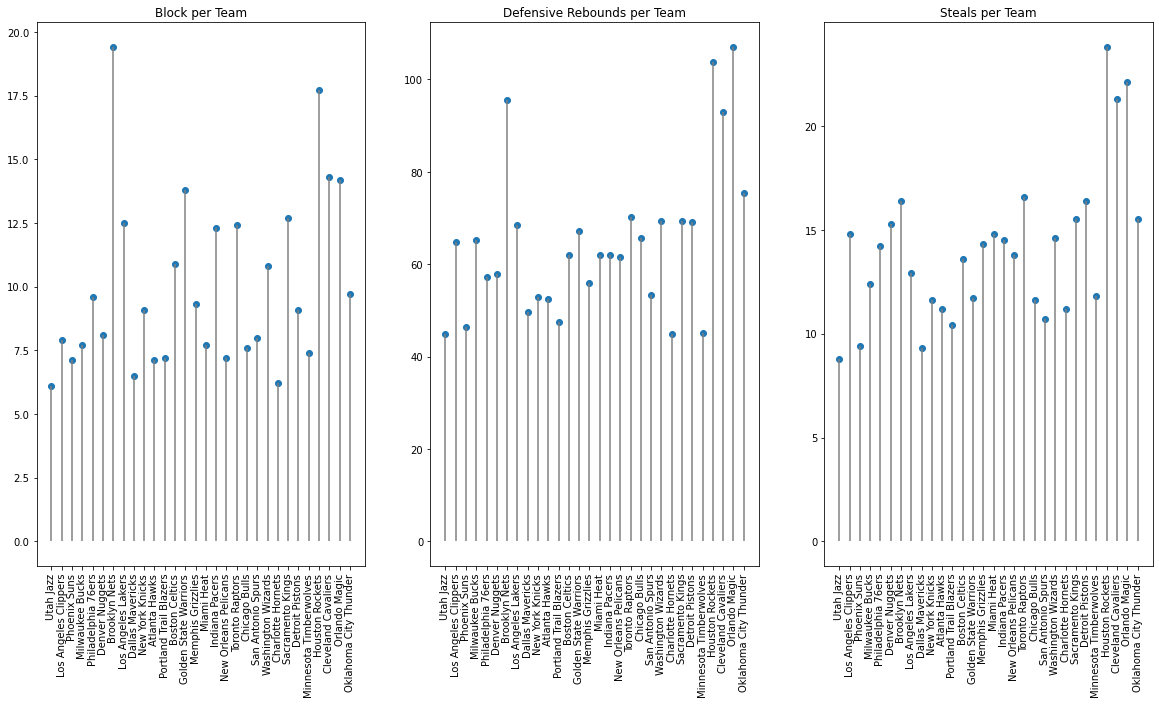

In [70]:
fig = plt.figure(figsize=(20,10))
fig.tight_layout()

ax0= fig.add_subplot(1,3,1)
ax1= fig.add_subplot(1,3,2)
ax2= fig.add_subplot(1,3,3)

ax0.scatter(Team_Ratings['Team'], Team_Ratings['BLK'])
ax0.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
ax0.set_title('Block per Team')
for i,j in zip(Team_Ratings['Team'], Team_Ratings['BLK']):
    ax0.vlines(x=i, ymin=0, ymax=j, color='grey')

ax1.scatter(Team_Ratings['Team'], Team_Ratings['DRB'])
ax1.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
ax1.set_title('Defensive Rebounds per Team')
for i,j in zip(Team_Ratings['Team'], Team_Ratings['DRB']):
    ax1.vlines(x=i, ymin=0, ymax=j, color='grey')

ax2.scatter(Team_Ratings['Team'], Team_Ratings['STL'])
ax2.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
ax2.set_title('Steals per Team')
for i,j in zip(Team_Ratings['Team'], Team_Ratings['STL']):
    ax2.vlines(x=i, ymin=0, ymax=j, color='grey')

plt.savefig('Traditional_Metrics.png')    
    
plt.show(fig)

<ipython-input-71-bb627f872a20>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
<ipython-input-71-bb627f872a20>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
<ipython-input-71-bb627f872a20>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Team_Ratings['Team'], rotation='vertical')


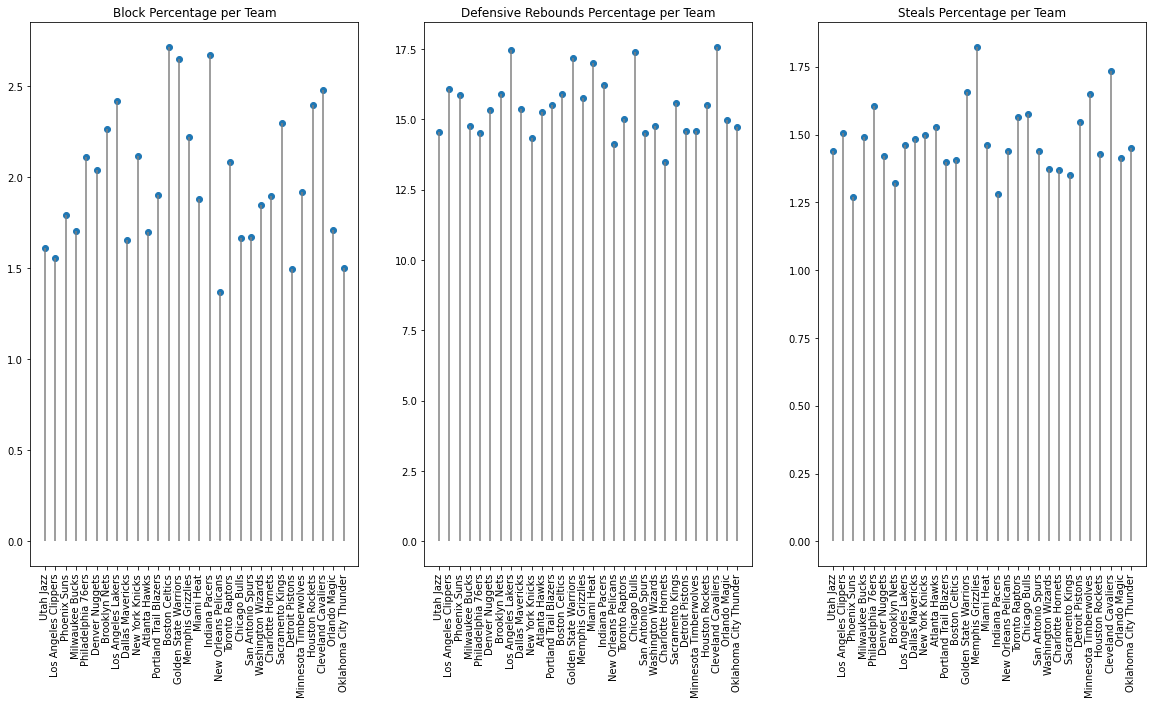

In [71]:
fig1 = plt.figure(figsize=(20,10))
fig1.tight_layout()

ax0= fig1.add_subplot(1,3,1)
ax1= fig1.add_subplot(1,3,2)
ax2= fig1.add_subplot(1,3,3)

ax0.scatter(Team_Ratings['Team'], Team_Ratings['BLK%'])
ax0.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
ax0.set_title('Block Percentage per Team')
for i,j in zip(Team_Ratings['Team'], Team_Ratings['BLK%']):
    ax0.vlines(x=i, ymin=0, ymax=j, color='grey')

ax1.scatter(Team_Ratings['Team'], Team_Ratings['DRB%'])
ax1.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
ax1.set_title('Defensive Rebounds Percentage per Team')
for i,j in zip(Team_Ratings['Team'], Team_Ratings['DRB%']):
    ax1.vlines(x=i, ymin=0, ymax=j, color='grey')

ax2.scatter(Team_Ratings['Team'], Team_Ratings['STL%'])
ax2.set_xticklabels(Team_Ratings['Team'], rotation='vertical')
ax2.set_title('Steals Percentage per Team')
for i,j in zip(Team_Ratings['Team'], Team_Ratings['STL%']):
    ax2.vlines(x=i, ymin=0, ymax=j, color='grey')

plt.savefig('Advance_Metrics.png') 

plt.show(fig1)